# Cleaning Data in Python

July 2019

Noah Markowitz

Based on the course https://www.datacamp.com/courses/cleaning-data-in-python

Note: Datasets for this course can be easily retrieved with:

`curl <url> > file.csv`

For example

`curl https://assets.datacamp.com/production/repositories/666/datasets/cf05b5e01009dd5d61d7db5ac5fb790042e7fd09/tb.csv > tb.csv`

## Exploring your Data

"Cleaning" Data:
* Prepare data for analysis
* Data almost never comes in clean
* Diagnose data for any problems

Common problems in a dataset
* Inconsistent column names
* Missing data
* Outliers
* Duplicate rows
* Untidy
* Need to process columns
* Column types can signal unexpected data values

Exploring data can start with `.head()` and `.tail()` methods.

The `.shape` and `.columns` attributes let you see the shape of the DataFrame and obtain a list of its columns. From here, you can see which columns are relevant to the questions you'd like to ask of the data.

In [1]:
# Import display function
from IPython.display import display
print_sep = '\n\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n\n'

In [56]:
# Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv('dob_job_application_filings_subset.csv')

# Print the head of df
display(df.head())

# Print the tail of df
display(df.tail())

# Print the shape of df
display(df.shape)

# Print the columns of df
print(df.columns)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate
0,121577873,2,MANHATTAN,386,PARK AVENUE SOUTH,857,38,1016890,A2,D,...,MIGLIORE,MACKLOWE MANAGEMENT,126,EAST 56TH STREET,NEW YORK,NY,10222,2125545837,GENERAL MECHANICAL & PLUMBING MODIFICATIONS AS...,04/26/2013 12:00:00 AM
1,520129502,1,STATEN ISLAND,107,KNOX PLACE,342,1,5161350,A3,A,...,BLUMENBERG,NA,107,KNOX PLACE,STATEN ISLAND,NY,10314,3477398892,BUILDERS PAVEMENT PLAN 143 LF. ...,04/26/2013 12:00:00 AM
2,121601560,1,MANHATTAN,63,WEST 131 STREET,1729,9,1053831,A2,Q,...,MARKOWITZ,635 RIVERSIDE DRIVE NY LLC,619,WEST 54TH STREET,NEW YORK,NY,10016,2127652555,GENERAL CONSTRUCTION TO INCLUDE NEW PARTITIONS...,04/26/2013 12:00:00 AM
3,121601203,1,MANHATTAN,48,WEST 25TH STREET,826,69,1015610,A2,D,...,CASALE,48 W 25 ST LLC C/O BERNSTEIN,150,WEST 30TH STREET,NEW YORK,NY,10001,2125941414,STRUCTURAL CHANGES ON THE 5TH FLOOR (MOONDOG E...,04/26/2013 12:00:00 AM
4,121601338,1,MANHATTAN,45,WEST 29 STREET,831,7,1015754,A3,D,...,LEE,HYUNG-HYANG REALTY CORP,614,8 AVENUE,NEW YORK,NY,10001,2019881222,FILING HEREWITH FACADE REPAIR PLANS. WORK SCOP...,04/26/2013 12:00:00 AM


,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate
12841,520143988,1,STATEN ISLAND,8,NOEL STREET,5382,20,5069722,A2,D,...,MALITO,GENO MALITO,8,NOEL STREET,STATEN ISLAND,NY,10312,9174685659,HORIZONTAL ENLARGEMENT OF ATTACHED ONE CAR GAR...,06/13/2013 12:00:00 AM
12842,121613833,1,MANHATTAN,724,10 AVENUE,1059,4,1082503,A2,D,...,CROMAN,722-724 10TH AVENUE HOLDING LLC,632,BROADWAY,NEW YORK,NY,10012,2122289300,RENOVATION OF EXISTING APARTMENT #3B ON THIRD ...,06/13/2013 12:00:00 AM
12843,121681260,1,MANHATTAN,350,MANHATTAN AVE.,1848,31,1055849,A2,A,...,ARYEH,DG UWS LLC,619,WEST 54TH STREET,NEW YORK,NY,10019,2127652555,REPLACE BURNER IN EXSTG BOILER WITH NEW GAS BU...,06/13/2013 12:00:00 AM
12844,320771704,1,BROOKLYN,499,UNION STREET,431,43,3007185,A2,D,...,WIGGINS,N/A,77,PROSPECT PLACE,BROOKLYN,NY,11217,9178487799,INSTALL NEW SPRINKLER SYSTEM THROUGHOUT THE BU...,06/13/2013 12:00:00 AM
12845,520143951,1,STATEN ISLAND,1755,RICHMOND ROAD,887,28,5022931,A2,D,...,CAMBRIA,RONALD CAMBRIA,1755,RICHMOND ROAD,STATEN ISLAND,NY,10304,7184482740,INTERIOR PARTITIONS AND MINOR PLUMBING WORK TO...,06/13/2013 12:00:00 AM


(12846, 82)

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

The rest of the time we're just going to use a subset of the dataset and call it `df_subset`

In [57]:
columns_of_interest = ['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee', 
                       'Existing Zoning Sqft', 'Proposed Zoning Sqft', 
                       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
                       'Proposed No. of Stories', 'Existing Height', 'Proposed Height']

df_subset = df[columns_of_interest]
print(df_subset.columns,end = '\n\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n\n')
display(df_subset.head())

Index(['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee',
       'Existing Zoning Sqft', 'Proposed Zoning Sqft',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
       'Proposed No. of Stories', 'Existing Height', 'Proposed Height'],
      dtype='object')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



,Job #,Doc #,Borough,Initial Cost,Total Est. Fee,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height
0,121577873,2,MANHATTAN,$75000.00,$986.00,0,0,0,0,0,0,0,0
1,520129502,1,STATEN ISLAND,$0.00,$1144.00,0,0,0,143,0,0,0,0
2,121601560,1,MANHATTAN,$30000.00,$522.50,0,0,0,0,5,5,54,54
3,121601203,1,MANHATTAN,$1500.00,$225.00,0,0,0,0,12,12,120,120
4,121601338,1,MANHATTAN,$19500.00,$389.50,0,0,0,0,6,6,64,64


The `.info()` method provides important information about a DataFrame, such as the number of rows, number of columns, number of non-missing values in each column, and the data type stored in each column.

In [4]:
# Print the info of df_subset
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 13 columns):
Job #                      12846 non-null int64
Doc #                      12846 non-null int64
Borough                    12846 non-null object
Initial Cost               12846 non-null object
Total Est. Fee             12846 non-null object
Existing Zoning Sqft       12846 non-null int64
Proposed Zoning Sqft       12846 non-null int64
Enlargement SQ Footage     12846 non-null int64
Street Frontage            12846 non-null int64
ExistingNo. of Stories     12846 non-null int64
Proposed No. of Stories    12846 non-null int64
Existing Height            12846 non-null int64
Proposed Height            12846 non-null int64
dtypes: int64(10), object(3)
memory usage: 1.3+ MB
None


In [5]:
# Clean up data by removing dollar sign $ from 'Initial Cost' and 'Total Est. Fee' columns
df_subset['Initial Cost'] = df_subset['Initial Cost'].str.replace('$','',regex = False).astype(float)
print(df_subset['Initial Cost'].head())
df_subset['Total Est. Fee'] = df_subset['Total Est. Fee'].str.replace('$','',regex = False).astype(float)
print(df_subset['Total Est. Fee'].head())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0    75000.0
1        0.0
2    30000.0
3     1500.0
4    19500.0
Name: Initial Cost, dtype: float64
0     986.0
1    1144.0
2     522.5
3     225.0
4     389.5
Name: Total Est. Fee, dtype: float64


### Using EDA

Explore your data with simple methods such as counting frequency. For example:
`df_subset['country'].value_counts(dropna = False)`

Our summary stats to spot outliers using `describe()` method

In [6]:
df_subset.describe()

,Job #,Doc #,Initial Cost,Total Est. Fee,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height
count,1.284600e+04,12846.000000,1.284600e+04,1.284600e+04,1.284600e+04,1.284600e+04,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000
mean,2.426788e+08,1.162930,1.803139e+05,2.894909e+03,1.439973e+03,2.007286e+03,46.101432,3.069360,8.062354,8.144325,94.022809,94.917562
std,1.312507e+08,0.514937,7.961524e+06,1.213534e+05,3.860757e+04,4.081570e+04,784.216569,37.246034,11.874080,11.843492,146.917360,146.580666
min,1.036438e+08,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.216206e+08,1.000000,0.000000e+00,2.250000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,20.000000,21.000000
50%,2.202645e+08,1.000000,1.597500e+04,4.195000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,4.000000,45.000000,45.000000
75%,3.208652e+08,1.000000,6.790500e+04,9.297000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,9.000000,9.000000,105.000000,107.000000
max,5.400246e+08,9.000000,9.003000e+08,1.014000e+07,2.873107e+06,2.873107e+06,50384.000000,3160.000000,102.000000,102.000000,4200.000000,4200.000000


#### Frequency counts for categorical data

`.describe()` can only be used on numeric columns. Use `.value_counts()` method for categorical data which returns the frequency counts for each unique value in a column!

This method also has an optional parameter called `dropna` which is `True` by default. What this means is if you have missing data in a column, it will not give a frequency count of them. You want to set the dropna column to `False` so if there are missing values in a column, it will give you the frequency counts.

In [7]:
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False), end = print_sep)

# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False).head(), end = print_sep)

# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

NY    12391
NJ      241
PA       38
CA       20
OH       19
Name: State, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


#### Visual EDA

Used to 
* Spot outliers and obvious errors
* Plan data cleaning pipeline

Use Boxplots for
* Visualize Basic summary stats
* Outliers
* Percentiles (robust way of looking at distribution)

Use Scatterplots for
* Relationship between 2 numeric variables
* Flag potentially bad data
    + Errors aren't found by looking at just 1 variable
    
>Note: When there's extreme differences between min and max, it's good to view data on a log scale

In [8]:
%matplotlib inline

count    1.284600e+04
mean     1.439973e+03
std      3.860757e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.873107e+06
Name: Existing Zoning Sqft, dtype: float64


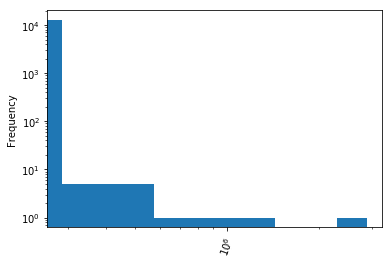

In [9]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Describe the column
print(df['Existing Zoning Sqft'].describe())

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()

You expected a large amount of counts on the left side of the plot because the 25th, 50th, and 75th percentiles have a value of 0. The plot shows us that there are barely any counts near the max value, signifying an outlier.

Histograms are great ways of visualizing single variables. To visualize multiple variables, boxplots are useful, especially when one of the variables is categorical. The pandas `.boxplot()` method is a quick way to do this

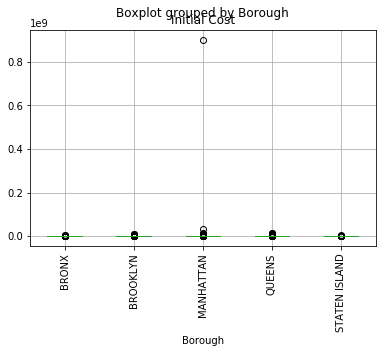

In [10]:
# Create the boxplot
df_subset.boxplot(column='Initial Cost', by='Borough', rot=90)

# Display the plot
plt.show()

Boxplots are great when you have a numeric column that you want to compare across different categories. When you want to visualize two numeric columns, scatter plots are ideal.

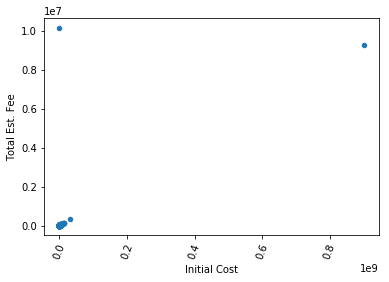

In [11]:
# Create and display the second scatter plot
df_subset.plot(kind='scatter', x='Initial Cost', y='Total Est. Fee', rot = 70)
plt.show()

## Tidying Data for Analysis

Principles of tidy data
* Columns represent variables
* Rows represent individual observations
* Observational units form tables

There are data formats better for reporting, and others better for analysis

### Melting Data

EX: We want columns columns containing values instead of variables. Use `pd.melt()` method

Reshaping your data using melt

Melting data is the process of turning columns of your data into rows of data

There are two parameters you should be aware of: 
* `id_vars` - The columns of the data you do not want to melt (i.e., keep it in its current shape)
* `value_vars` - The columns you do wish to melt into rows. 

By default, if no `value_vars` are provided, all columns not set in the `id_vars` will be melted. This could save a bit of typing, depending on the number of columns that need to be melted.

`pd.melt(dataframe,id_vars = [], value_vars = [])`

In [12]:
# Import the dataframe
airquality = pd.read_csv('airquality.csv')

# Print the head of airquality
print(airquality.head(), end = print_sep)

# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars=['Month', 'Day'])

# Print the head of airquality_melt
print(airquality_melt.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

   Month  Day variable  value
0      5    1    Ozone   41.0
1      5    2    Ozone   36.0
2      5    3    Ozone   12.0
3      5    4    Ozone   18.0
4      5    5    Ozone    NaN


Customizing melted data

When melting DataFrames, it would be better to have column names more meaningful than `variable` and `value` (the default names used by `pd.melt()`).

You can rename the `variable` column by specifying an argument to the `var_name` parameter, and the `value` column by specifying an argument to the `value_name` parameter.

In [13]:
# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')

# Print the head of airquality_melt
print(airquality_melt.head())

   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN


### Pivoting Data

The opposite of melting. 
* In melting, columns turn into rows - Such as each timepoint in a longitudinal study being in its' own row
* In pivoting, turn unique values into separate columns

Pivoting is good for transforming from analysis-friendly shape to report-friendly shape (so different variables aren't stored in the same column)

Using `.pivot_table()`

Parameters include
* `index` - can use to specify the columns that you don't want pivoted: It is similar to the `id_vars` parameter of `pd.melt()`
* `columns` - the name of the column you want to pivot
* `values` - the values to be used when the column is pivoted

In [14]:
# Print the head of airquality_melt
print(airquality_melt.head(), end = print_sep)

# Pivot airquality_melt: airquality_pivot
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading')

# Print the head of airquality_pivot
print(airquality_pivot.head())

   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3


**Resetting the index of a DataFrame**

After pivoting airquality_melt in the previous exercise, you didn't quite get back the original DataFrame.

What you got back instead was a pandas DataFrame with a *hierarchical index (also known as a MultiIndex)*. In essence, they allow you to group columns or rows by another variable - in this case, by `'Month'` as well as `'Day'`. There's a very simple method you can use to get back the original DataFrame from the pivoted DataFrame: `.reset_index()`

In [60]:
# Print the index of airquality_pivot
print(airquality_pivot.index)

# Reset the index of airquality_pivot: airquality_pivot_reset
airquality_pivot_reset = airquality_pivot.reset_index()

# Print the new index of airquality_pivot_reset
print(airquality_pivot_reset.index, end = print_sep)

# Print the head of airquality_pivot_reset
display(airquality_pivot_reset.head())

RangeIndex(start=0, stop=153, step=1)
RangeIndex(start=0, stop=153, step=1)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



measurement,index,Month,Day,Ozone,Solar.R,Temp,Wind
0,0,5,1,41.0,190.0,67.0,7.4
1,1,5,2,36.0,118.0,72.0,8.0
2,2,5,3,12.0,149.0,74.0,12.6
3,3,5,4,18.0,313.0,62.0,11.5
4,4,5,5,NaN,NaN,56.0,14.3


Pivoting duplicate values

So far, you've used the .pivot_table() method when there are multiple index values you want to hold constant during a pivot.

Let's say your data collection method accidentally duplicated your dataset. Such a dataset, in which each row is duplicated

You'll see that by using `.pivot_table()` and the `aggfunc` parameter, you can not only reshape your data, but also remove duplicates. Finally, you can then flatten the columns of the pivoted DataFrame using `.reset_index()`.

In [16]:
# Create a dataframe that duplicates the data within airquality_melt
airquality_dup = airquality_melt.append(airquality_melt)

# Inspect the sizes of both dataframes
print(airquality_melt.shape)
print(airquality_dup.shape)

(612, 4)
(1224, 4)


In [17]:
# Import numpy
import numpy as np

# Pivot table the airquality_dup: airquality_pivot
airquality_pivot = airquality_dup.pivot_table(index=['Month', 'Day'], columns= 'measurement', values='reading', aggfunc=np.mean)

# Print the head of airquality_pivot before reset_index
display(airquality_pivot.head(), end = print_sep)

# Reset the index of airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

# Print the head of airquality_pivot
print(airquality_pivot.head(), end = print_sep)

# Print the head of airquality
print(airquality.head())

measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

measurement  Month  Day  Ozone  Solar.R  Temp  Wind
0                5    1   41.0    190.0  67.0   7.4
1                5    2   36.0    118.0  72.0   8.0
2                5    3   12.0    149.0  74.0  12.6
3                5    4   18.0    313.0  62.0  11.5
4                5    5    NaN      NaN  56.0  14.3

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5


### Beyond Melt and Pivot

In this exercise, you're going to tidy the 'm014' column, which represents males aged 0-14 years of age. In order to parse this value, you need to extract the first letter into a new column for gender, and the rest into a column for age_group

In [55]:
# Import dataset
tb = pd.read_csv('tb.csv')

# print head of dataset
display(tb.head())

# Melt tb: tb_melt
tb_melt = pd.melt(tb, id_vars=['country', 'year'])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]

# Print the head of tb_melt
display(tb_melt.head())

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,2000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5.0,12.0,10.0,NaN,3.0,16.0,1.0,3.0,0.0,0.0,4.0,NaN
2,AF,2000,52.0,228.0,183.0,149.0,129.0,94.0,80.0,NaN,93.0,414.0,565.0,339.0,205.0,99.0,36.0,NaN
3,AG,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
4,AL,2000,2.0,19.0,21.0,14.0,24.0,19.0,16.0,NaN,3.0,11.0,10.0,8.0,8.0,5.0,11.0,NaN


,country,year,variable,value,gender,age_group
0,AD,2000,m014,0.0,m,014
1,AE,2000,m014,2.0,m,014
2,AF,2000,m014,52.0,m,014
3,AG,2000,m014,0.0,m,014
4,AL,2000,m014,2.0,m,014


Splitting a column with `.split()` and `.get()`

Another common way multiple variables are stored in columns is with a delimiter. 

This time, you cannot directly slice the variable by position as in the previous exercise. You now need to use Python's built-in string method called `.split()`. By default, this method will split a string into parts separated by a space. Note that you will first have to access the str attribute of a column before it can be used

The next challenge is to extract the first element of this list and assign it to a `type` variable, and the second element of the list to a `country` variable. You can accomplish this by accessing the `str` attribute of the column and using the `.get()` method to retrieve the `0` or `1` index, depending on the part you want.

In [61]:
# Import dataset
ebola = pd.read_csv('ebola.csv')

# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')

# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')

# Create the 'type' column
ebola_melt['type'] = ebola_melt.str_split.str.get(0)

# Create the 'country' column
ebola_melt['country'] = ebola_melt.str_split.str.get(1)

# Print the head of ebola_melt
display(ebola_melt.head())

,Date,Day,type_country,counts,str_split,type,country
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]",Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]",Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]",Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]",Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]",Cases,Guinea


## Combining Data for Analysis

### Concatenating Data

Data can come in separate sheets/files. You may want to combine the dataframes. To do so, use `pd.concat()`

Ex: `pd.concat([df1, df2])`

Below we're combining rows of data. This means we're increasing the number of rows, not the number of columns

In [62]:
# Import the data and copy it into 3 variables
uber = pd.read_csv('nyc_uber_2014.csv')
uber1 = uber; uber2 = uber; uber3 = uber

# Concatenate uber1, uber2, and uber3: row_concat
row_concat = pd.concat([uber1, uber2, uber3])

# Print the shape of row_concat
print(row_concat.shape, end = print_sep)

# Print the head of row_concat
display(row_concat.head())

(891, 5)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



,Unnamed: 0,Date/Time,Lat,Lon,Base
0,0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


Now we're going to combine columns of data, increasing the number of columns/variables in a dataframe

Do this using `pd.concat()`
+ This time with the keyword argument `axis=1`. 
+ The default, `axis=0`, is for a row-wise concatenation.

In [63]:
# Create the first dataframe that will be used
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='status_country', value_name='counts')

# Create the second DataFrame that will be used
tmp = ebola_melt.status_country.str.split('_')
status = list(tmp.str.get(0))
country = list(tmp.str.get(1))
status_country = pd.DataFrame({'status' : status ,'country' : country})

# Concatenate ebola_melt and status_country column-wise: ebola_tidy
ebola_tidy = pd.concat([ebola_melt, status_country], axis = 1)

# Print the shape of ebola_tidy
print(ebola_tidy.shape, end = print_sep)

# Print the head of ebola_tidy
display(ebola_tidy.head())

(1952, 6)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



,Date,Day,status_country,counts,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


### Finding Files

Using `glob` module that searches for files that match a string

Can use wildcards. Ex: `file_?.csv` will match with any file with this exact string except the question mark is a stand-in for any other character. So it can match with file_1.csv, file_b.csv but it won't match file_cv.csv

In [64]:
# Import necessary modules
import glob

# Write the pattern: pattern
pattern = '*.csv'

# Save all file matches: csv_files
csv_files = glob.glob(pattern)

# Print the file names
print(csv_files, end = print_sep)

# Load the second file into a DataFrame: csv2
csv2 = pd.read_csv(csv_files[1])

# Print the head of csv2
display(csv2.head())

['airquality.csv', 'nyc_uber_2014.csv', 'tips.csv', 'dob_job_application_filings_subset.csv', 'tips2.csv', 'ebola.csv', 'tips_bad_data.csv', 'tb.csv', 'gapminder.csv']

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



,Unnamed: 0,Date/Time,Lat,Lon,Base
0,0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


We can iterate through a list of many csv files and load them using `glob`

Ex: The variable `csv_files` is a list of csv files with similar columns

```
# Create an empty list: frames
frames = []

#  Iterate over csv_files
for csv in csv_files:

    #  Read csv into a DataFrame: df
    df = pd.read_csv(csv)
    
    # Append df to frames
    frames.append(df)

# Concatenate frames into a single DataFrame: uber
uber = pd.concat(frames)
```

This will put all the csv files into a single dataframe

### Merging Data

Concatenation is not the only way data can be combined

Merging allows combining disparate datasets based on common columns

For instance, use this when rows don't align

Use `pd.merge()` function. Arguments are:
+ `left` - Dataframe to be on the left
+ `right` - Dataframe to be on the right
+ `on` - What column (column name must be the same in both DataFrames) to merge on and align rows to
+ `left_on` - Use in conjunction with `right_on` if `on` can't be used. Specify which column in the left DataFrame should be aligned to the right DataFrame
+ `right_on` - Use in conjunction with `left_on` if `on` can't be used. Specify which column in the right DataFrame should be aligned to the left DataFrame

Only specify `on` parameter, or `left_on` with `right_on`

Types of merges
* One-to-one - Two columns in to different DataFrames can be perfectly aligned as they have similar values
* Many-to-one/one-to-many - 
* Many-to-many

**1-to-1 Merge**

In [23]:
# Start by creating some sample DataFrames
site_tmp = {'name' : ['DR-1', 'DR-3', 'MSK-4'], 
            'lat' : [-49.85, -47.15, -48.87],
           'long' : [-128.57, -126.72, -123.4]}
visited_tmp = {'ident' : [619, 734, 837],
              'site' : ['DR-1', 'DR-3', 'MSK-4'],
              'dated' : ['1927-02-08', '1939-01-07', '1932-01-14']}
site = pd.DataFrame(site_tmp)
visited = pd.DataFrame(visited_tmp)

# Now see both DataFrames
print(site, end = print_sep)
print(visited)

    name    lat    long
0   DR-1 -49.85 -128.57
1   DR-3 -47.15 -126.72
2  MSK-4 -48.87 -123.40

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

   ident   site       dated
0    619   DR-1  1927-02-08
1    734   DR-3  1939-01-07
2    837  MSK-4  1932-01-14


In [24]:
# Merge the DataFrames: o2o
o2o = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Print o2o
print(o2o)

    name    lat    long  ident   site       dated
0   DR-1 -49.85 -128.57    619   DR-1  1927-02-08
1   DR-3 -47.15 -126.72    734   DR-3  1939-01-07
2  MSK-4 -48.87 -123.40    837  MSK-4  1932-01-14


**Many-to-1 data merge**

In a many-to-one (or one-to-many) merge, one of the values will be duplicated and recycled in the output. That is, one of the keys in the merge is not unique.

In [66]:
# First change the DataFrame a little
ident = [619, 622, 734, 735, 751, 752, 837, 844]
site_col = ['DR-1', 'DR-1', 'DR-3', 'DR-3', 'DR-3', 'DR-3', 'MSK-4', 'DR-1']
dated = ['1927-02-08', '1927-02-10', '1939-01-07', '1930-01-12', '1930-02-26', np.nan, '1932-01-14', '1932-03-22']
visited = pd.DataFrame({'ident' : ident, 'site' : site_col, 'dated' : dated})
display(visited)

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [65]:
# Merge the DataFrames: m2o
m2o = pd.merge(left = site, right = visited, left_on = 'name', right_on = 'site')

# Print m2o
display(m2o)

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,844,DR-1,1932-03-22
3,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
4,DR-3,-47.15,-126.72,735,DR-3,1930-01-12
5,DR-3,-47.15,-126.72,751,DR-3,1930-02-26
6,DR-3,-47.15,-126.72,752,DR-3,NaN
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


**Many-to-many data merge**

The final merging scenario occurs when both DataFrames do not have unique keys for a merge. What happens here is that for each duplicated key, every pairwise combination will be created.

Below is an example of this type of merge. `df1` and `df2` have been merged in this manner to create `df3`

In [27]:
# Create some DataFrames
df1 = pd.DataFrame({'c1' : ['a', 'a', 'b', 'b'],
                   'c2' : [1,2,3,4]})
df2 = pd.DataFrame({'c1' : ['a', 'a', 'b', 'b'],
                   'c2' : [10,20,30,40]})
df3 = pd.DataFrame({'c1' : ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                   'c2_x' : [1, 1, 2, 2, 3, 3, 4, 4],
                   'c2_y' : [10, 20, 10, 20, 30, 40, 30, 40]})
print(df1, end = print_sep)
print(df2, end = print_sep)
print(df3)

  c1  c2
0  a   1
1  a   2
2  b   3
3  b   4

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  c1  c2
0  a  10
1  a  20
2  b  30
3  b  40

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  c1  c2_x  c2_y
0  a     1    10
1  a     1    20
2  a     2    10
3  a     2    20
4  b     3    30
5  b     3    40
6  b     4    30
7  b     4    40


Now another example

In [67]:
# Create new 'survery' DataFrame
taken_col = [619, 619, 622, 622, 734, 734, 734, 735, 735, 735, 751, 751, 751, 752, 752, 752, 752, 837, 837, 837, 844]
person_col = ['dyer', 'dyer', 'dyer', 'dyer', 'pb', 'lake', 'pb', 'pb', np.nan, np.nan, 'pb', 'pb', 'lake', 'lake', 'lake', 'lake', 'roe', 'lake', 'lake', 'roe', 'roe']
quant_col = ['rad', 'sal', 'rad', 'sal', 'rad', 'sal', 'temp', 'rad', 'sal', 'temp', 'rad', 'temp', 'sal', 'rad', 'sal', 'temp', 'sal', 'rad', 'sal', 'sal', 'rad']
reading_col = [9.82, 0.13, 7.8, 0.09, 8.41, 0.05, -21.5, 7.22, 0.06, -26.0, 4.35, -18.5, 0.1, 2.19, 0.09, -16.0, 41.6, 1.46, 0.21, 22.5, 11.25]
survey = pd.DataFrame({'taken' : taken_col, 'person' : person_col, 
                       'quant' : quant_col, 'reading' : reading_col})
display(survey.head())

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41


In [68]:
# Merge site and visited: m2m
m2m = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Merge m2m and survey: m2m
m2m = pd.merge(left=m2m, right=survey, left_on='ident', right_on='taken')

# Print the first 20 lines of m2m
display(m2m.head(20))

,name,lat,long,ident,site,dated,taken,person,quant,reading
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,DR-1,-49.85,-128.57,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,DR-1,-49.85,-128.57,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,DR-1,-49.85,-128.57,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,DR-1,-49.85,-128.57,844,DR-1,1932-03-22,844,roe,rad,11.25
5,DR-3,-47.15,-126.72,734,DR-3,1939-01-07,734,pb,rad,8.41
6,DR-3,-47.15,-126.72,734,DR-3,1939-01-07,734,lake,sal,0.05
7,DR-3,-47.15,-126.72,734,DR-3,1939-01-07,734,pb,temp,-21.50
8,DR-3,-47.15,-126.72,735,DR-3,1930-01-12,735,pb,rad,7.22
9,DR-3,-47.15,-126.72,735,DR-3,1930-01-12,735,NaN,sal,0.06


## Cleaning Data for Analysis

### Data Types and Converting Data Types

In dataframes, "dtypes" are the type of data represented in the column
+ int64 - Integers
+ float
+ object - Usually strings
+ category

May be times we want to convert from one type to another
+ Such as numeric to string and vice-versa

Can be changed using the `astype()` method
+ EX: `df['a'] = df['a'].astype(str)`
+ Now column 'a' will have strings as elements

In [69]:
# Import the data
tips = pd.read_csv('tips.csv')

# Convert the sex column to type 'category'
tips.sex = tips.sex.astype('category')

# Convert the smoker column to type 'category'
tips.smoker = tips.smoker.astype('category')

# Print the info of tips
display(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB


None

If you expect the data type of a column to be numeric (`int` or `float`), but instead it is of type object, this typically means that there is a non numeric value in the column, which also signifies bad data.

You can use the `pd.to_numeric()` function to convert a column into a numeric data type. If the function raises an error, you can be sure that there is a bad value within the column.

Pass the argument `errors` so that the function will know how to label incorrect pieces of data. In this case by using `errors = coerce` invalid data will be converted to `NaN`

In [31]:
# Import the bad data
tips = pd.read_csv('tips_bad_data.csv')

# Convert 'total_bill' to a numeric dtype
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')

# Convert 'tip' to a numeric dtype
tips['tip'] = pd.to_numeric(tips['tip'], errors='coerce')

# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    235 non-null float64
tip           235 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          238 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB
None


### Regular Expressions to clean strings

Much data cleaning is string manipulation. Most data is unstructured text

For string pattern matching, use `re` library

Some examples:
* `\d` - A digit
* `\d*` - Match any digit follow by anything else
* `\$\d*` - Match for a dollar sign $ followed by any digit
    + The dollar sign is already a special character so a backslash is needed to escape it
* `\d{2}` - Match EXACTLY 2 digits
* `^` - The karrot character, look for matching patterns at the beginning of the regular expression
    + Ex: `^\d{3}-\d{3}-\d{4}` to look for patterns that begin with this sequence
* `$` - Look for matching patterns at the beginning of the regular expression
    + Ex: `\d{3}-\d{3}-\d{4}$` to look for patterns that end with this sequence
    + Ex: `^\d{3}-\d{3}-\d{4}$` pattern must match exactly this sequence
    
Here's a good example
```
import re
pattern = re.compile('\$\d*\.\d{2}')
result = pattern.match('$17.89')
print( bool(result) )

> True
```

The `re.compile()` function creates a regular expression to evaluate

In [32]:
# Import the regular expression module
import re

# Compile the pattern: prog
prog = re.compile('\d{3}-\d{3}-\d{4}')

# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))

# See if the pattern matches
result2 = prog.match('1123-456-7890')
print(bool(result2))

True
False


When using a regular expression to extract multiple numbers (or multiple pattern matches, to be exact), you can use the `re.findall()` function.

Ex: There's the string `'the recipe calls for 10 strawberries and 2 bananas'` and you want to extract the numbers in the string

Use `re.findall('\d+', <string>)`. We need the `+` character. It signifies 'one or more'. In this case, look for 'one or more digits'. This will make it so the number 10 wil be part of the ouput, rather than finding the numbers 1 and 0 separately

In [33]:
# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')
print(matches)

# Wrong way to do it
matches = re.findall('\d', 'the recipe calls for 10 strawberries and 1 banana')
print(matches)

['10', '1']
['1', '0', '1']


Some more pattern matching practice

More tips:
* Use `\.` to have the period evaluated as it's also a special character
* `[A-Z]` looks for any capitalized characters. 
    + These two work similarly to the one above: `[a-z]` and `[0-9]`

In [34]:
# Write the first pattern
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
print(pattern1)

# Write the second pattern
pattern2 = bool(re.match(pattern='\$\d{3}\.\d{2}', string='$123.45'))
print(pattern2)

# Write the third pattern
pattern3 = bool(re.match(pattern='[A-Z]\w*', string='Australia'))
print(pattern3)

True
True
True


### Using Functions to clean data

You can use the `.apply()` method to apply a function across entire rows or columns of DataFrames. However, note that each column of a DataFrame is a pandas Series. Functions can also be applied across Series. 

The `apply()` method has an additional argument of `axis` to specify row or column-wise operation. Default is `axis = 0` so operation is applied to each column. `axis=1` will apply function to each row

If a function takes additional inputs, then pass it into the `apply()` method.

Ex: A function `my_func` has been created and takes an additional argument of `amount`

`df.money.apply(my_func, axis = 1, amount = x`

In [71]:
# Import the data
tips = pd.read_csv('tips.csv')

# Define recode_gender()
def recode_gender(gender):

    # Return 0 if gender is 'Female'
    if gender == 'Female':
        return 0
    
    # Return 1 if gender is 'Male'    
    elif gender == 'Male':
        return 1
    
    # Return np.nan    
    else:
        return np.nan

# Apply the function to the sex column
tips['recode'] = tips.sex.apply(recode_gender)

# Print the first five rows of tips
display(tips.head())

,total_bill,tip,sex,smoker,day,time,size,recode
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


Alternatively, for the above example, we could've just used the `.replace()` method or set the column type to `categorical`

**Lambda Functions**

You can easily use lambda functions for one-shot usage as an alternative to creating a new function altogether. Below a new column will be added that has the dollar sign '$' prepended to total_bill

In [70]:
# New column to practice with
tips['total_dollar'] = pd.Series(['$' + str(dollar) for dollar in tips.total_bill.tolist()])

# Write the lambda function using replace
tips['total_dollar_replace'] = tips.total_dollar.apply(lambda x: x.replace('$', ''))

# Write the lambda function using regular expressions
tips['total_dollar_re'] = tips.total_dollar.apply(lambda x: re.findall('\d+\.\d+', x)[0])

# Print the head of tips
display(tips.head())

,total_bill,tip,sex,smoker,day,time,size,total_dollar,total_dollar_replace,total_dollar_re
0,16.99,1.01,Female,No,Sun,Dinner,2,$16.99,16.99,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,$10.34,10.34,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,$21.01,21.01,21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,$23.68,23.68,23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,$24.59,24.59,24.59


### Duplicate and Missing data

Duplicate data can affect your data and skew results. Get rid of it with `.drop_duplicates()` method

For missing values, you can
* Leave as is
* Drop them
    + Can be done with `.dropna()` method. This will drop all rows with a `NaN` value in any of its' columns
* Fill missing values
    + Can be done with `.fillna()` method
        + Can fill with a test statistic such as mean of the column

In the below example, a new dataframe, `tracks`,  is created based on columns from the dataframe `billboard`. Then all duplicates are dropped with `.drop_duplicates()` method

```
# Create the new DataFrame: tracks
tracks = billboard[['year', 'artist', 'track', 'time']]

# Drop the duplicates: tracks_no_duplicates
tracks_no_duplicates = tracks.drop_duplicates()

# Print info of tracks
print(tracks_no_duplicates.info())
```

Now filling missing values!

In [37]:
# Import data
airquality = pd.read_csv('airquality.csv')

# Calculate the mean of the Ozone column: oz_mean
oz_mean = airquality.Ozone.mean()

# Replace all the missing values in the Ozone column with the mean
airquality['Ozone'] = airquality['Ozone'].fillna(oz_mean)

# Print the info of airquality
print(airquality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      153 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB
None


### Testing Data with asserts

Assert statements can be used to programatically check (rather than visually) our data. Lets us detect early warnings and errors before analysis

Some handy functions to test if there's any missing values are
* `.notnull()` - Returns boolean array to see if values are not null
* `.all()` -  method returns True if all values are True.

In [38]:
# Import data
ebola = pd.read_csv('ebola.csv')

# Assert that there are no missing values
assert ebola.notnull().all().all()

AssertionError: 

The above needs lots of chains
+ The first chain, `.notnull()`, evaluates that each cell is not NaN value
+ The second chain, `.all()`, evaluates that each column doesn't have any null values
+ The last chain, `.all()`, evaluates if any of the columns contain a null value

In [39]:
# Assert that all values are >= 0
assert (ebola >= 0).all().all()

AssertionError: 

So we know there's a few problems with the `ebola` dataset

## Case Study: Putting it all together

In [40]:
# Import the data
cols_wanted = [str(x) for x in range(1800,1900)] # Make list of strings for columns to import
cols_wanted.insert(0,'Life expectancy')
g1800s = pd.read_csv('gapminder.csv', usecols = cols_wanted, nrows = 260) # Pick columns to import
g1800s = g1800s[cols_wanted] # Move 'Life Expectancy' column to the first position
display(g1800s.head())

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,27.29,27.28,27.27,27.26,27.25,27.24,27.23,27.22,27.21,27.20
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82


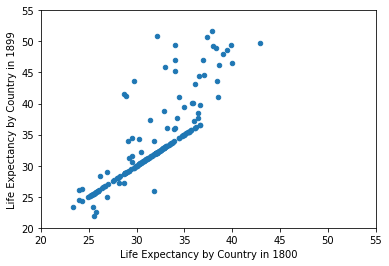

In [41]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()

Since you are given life expectancy level data by country and year, you could ask questions about how much the average life expectancy changes over each year.

In [42]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1

print('No errors! We are all good!') # This will only print if all the asserts are true

No errors! We are all good!


The Gapminder dataset has to be imported irregularly due to its' structure. Below the different elements of the dataframe will be concatenated

In [43]:
# Import the data
cols_wanted = [str(x) for x in range(1900,2000)] # Make list of strings for columns to import
cols_wanted.insert(0,'Life expectancy')
# Pick columns and rows to import: Start at row 261 and column 1900
g1900s = pd.read_csv('gapminder.csv', usecols = cols_wanted, nrows = 260, skiprows = range(1, 261))
g1900s = g1900s[cols_wanted] # Move 'Life Expectancy' column to the first position
display(g1900s.head())

,Life expectancy,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,27.19,27.18,27.17,27.16,27.15,27.14,27.12,27.11,27.10,...,49.5,49.3,49.4,49.5,48.9,49.4,49.7,49.5,48.6,50.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,73.3,73.4,73.6,73.6,73.6,73.7,73.8,74.1,74.2,74.2
4,Algeria,28.86,28.90,28.94,29.86,24.12,26.70,28.03,27.93,27.84,...,70.2,70.5,70.9,71.2,71.4,71.6,72.1,72.4,72.6,73.0


In [44]:
# Import the data
cols_wanted = [str(x) for x in range(2000,2017)] # Make list of strings for columns to import
cols_wanted.insert(0,'Life expectancy')
# Pick columns and rows to import: Start at row 261 and column 1900
g2000s = pd.read_csv('gapminder.csv', usecols = cols_wanted, nrows = 260, skiprows = range(1, 521))
g2000s = g2000s[cols_wanted] # Move 'Life Expectancy' column to the first position
display(g2000s.head())

,Life expectancy,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,50.1,50.4,51.0,51.4,51.8,52.0,52.1,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,74.7,75.1,75.5,75.7,75.9,76.2,76.4,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,73.3,73.5,73.8,73.9,74.4,74.8,75.0,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [45]:
# Concatenate the DataFrames row-wise
gapminder = pd.concat([g1800s, g1900s, g2000s], sort = True )

# Print the shape of gapminder
print(gapminder.shape)

# Print the head of gapminder
display(gapminder.head())

(780, 218)


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


Practice on reshaping data

In [46]:
# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(gapminder, id_vars = 'Life expectancy')

# Rename the columns
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

# Print the head of gapminder_melt
display(gapminder_melt.head())

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


Checking data types

In [47]:
# Convert the year column to numeric
gapminder_melt.year = pd.to_numeric(gapminder_melt.year)

# Test if country is of type object
assert gapminder_melt.country.dtypes == np.object

# Test if year is of type int64
assert gapminder_melt.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder_melt.life_expectancy.dtypes == np.float64

print('Yay! We all good!')

Yay! We all good!


More special characters for pattern matching
+ `\s` - whitespace

It is reasonable to assume that country names will contain:
+ The set of lower and upper case letters.
+ Whitespace between words.
+ Periods for any abbreviations.

In [48]:
# Create the series of countries: countries
countries = gapminder_melt['country']

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
display(invalid_countries)

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object

It's now time to deal with the missing data. There are several strategies for this: You can drop them, fill them in using the mean of the column or row that the missing value is in (also known as imputation), or, if you are dealing with time series data, use a forward fill or backward fill, in which you replace missing values in a column with the most recent known value in the column. See pandas Foundations for more on forward fill and backward fill.

In general, it is not the best idea to drop missing values, because in doing so you may end up throwing away useful information. In this data, the missing values refer to years where no estimate for life expectancy is available for a given country. You could fill in, or guess what these life expectancies could be by looking at the average life expectancies for other countries in that year, for example. Whichever strategy you go with, it is important to carefully consider all options and understand how they will affect your data.

In [53]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder_melt.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gapminder_melt.year).all()

# Drop the missing values
gapminder = gapminder_melt.dropna()

# Print the shape of gapminder
print(gapminder.shape)

(43857, 3)


After dropping the missing values from 'life_expectancy', the number of rows in the DataFrame has gone down from 169260 to 43857. In general, you should avoid dropping too much of your data, but if there is no reasonable way to fill in or impute missing values, then dropping the missing data may be the best solution.

Your next task is to investigate how average life expectancy changed over the years. To do this, you need to subset the data by each year, get the life_expectancy column from each subset, and take an average of the values. You can achieve this using the `.groupby()` method. 

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


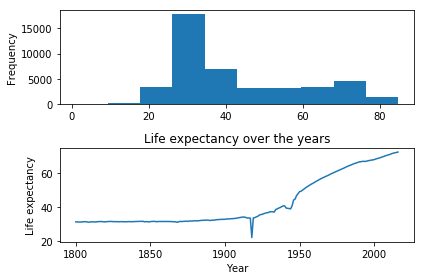

In [52]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder_melt.life_expectancy.plot(kind = 'hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder_melt.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
#gapminder.to_csv('gapminder.csv')
#gapminder_agg.to_csv('gapminder_agg.csv')